# Import Data

In [2]:
gdurltitanic = 'https://drive.google.com/file/d/15tUbXaTIktuLzNjTq6euUHqBpGNuz7u6/view?usp=sharing'
gdtitanic = 'https://drive.google.com/uc?export=download&id='+gdurltitanic.split('/')[-2]
gdurlhousing = 'https://drive.google.com/file/d/11bQwRc8TIPWbLXwnElIOf_NygTCwomwa/view?usp=sharing'
gdhousing = 'https://drive.google.com/uc?export=download&id='+gdurlhousing.split('/')[-2]
githousing = 'https://raw.githubusercontent.com/sjcorp/notebooks/master/datasets/housing/train.csv'

# Random Sample Imputation
When: Used when values are missing completely at Random
How: Take random observation from the dataset to replace NaN Values

Pros:
- Easy to implement
- Less distortion in variance
Cons:
- In every situation, randomness wont work

In [6]:
# Random Sample Imputation

import pandas as pd
df = pd.read_csv(gdtitanic, usecols = ['Age', 'Fare', 'Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df['Age'].dropna().sample()

597    49.0
Name: Age, dtype: float64

In [ ]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
def impute_nan(df, variable, median):
  df[variable+"_median"] = df[variable].fillna(median)
  df[variable+"_random"] = df[variable]
  ## It will fill up the NA value with the random sample
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  ## pandas need to have some index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
median = df.Age.median()
median

28.0

In [ ]:
impute_nan(df,"Age",median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Capturing NAN Values with a New Feature

This works well when data is not missing completely at random 

In [ ]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [8]:
df = pd.read_csv(gdtitanic, usecols = ['Age', 'Fare', 'Survived'])

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [ ]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


# Arbitrary Value Imputation
This technique was derived from Kaggle Competitions
It inconsists of replacing NAN by an Arbitrary Value
Arbitrary Values Properties:
- It should be more frequently present

Advantages:
- Easy
- Captures the importance of missing variables

Disadvantages
- Distorts the original distribution of the variable
- If missing variables are not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide what value to use

In [10]:
import pandas as pd
df = pd.read_csv(gdtitanic,usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

# Handling Missing Values for Categorical Variables

## Frequent Category Imputation (Mode Imputation)

Advantages:
- Easy to implement

Disadvantages:
- Will distort the relationship between the most frequent values and output/dependent variable
- Since we are using the most frequent labels, it may over-represent them, if there are many NANs

In [2]:
import pandas as pd
df = pd.read_csv(gdhousing,usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [3]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [10]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

Since BsmtQual & GarageType have very few missing values, we can replace them with the most frequently occuring value

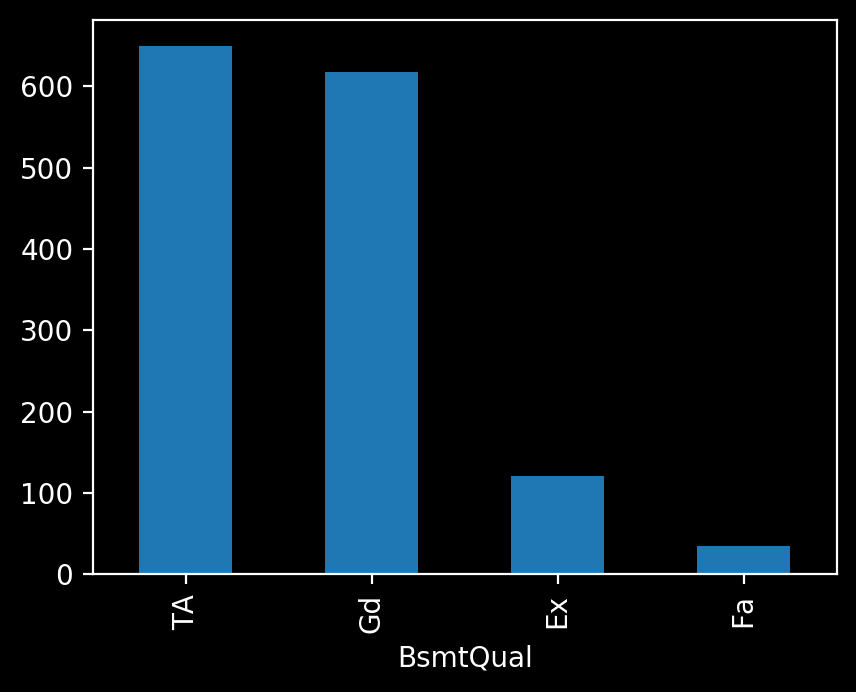

In [15]:
# Compute the frequency for each feature
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

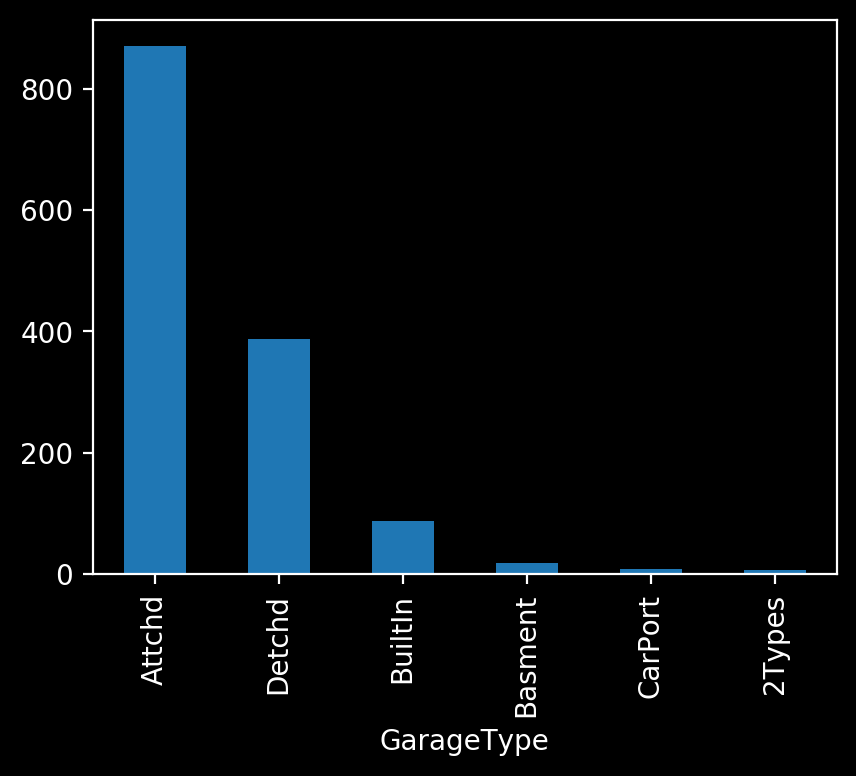

In [16]:
df.groupby(['GarageType'])['GarageType'].count().sort_values(ascending=False).plot.bar()

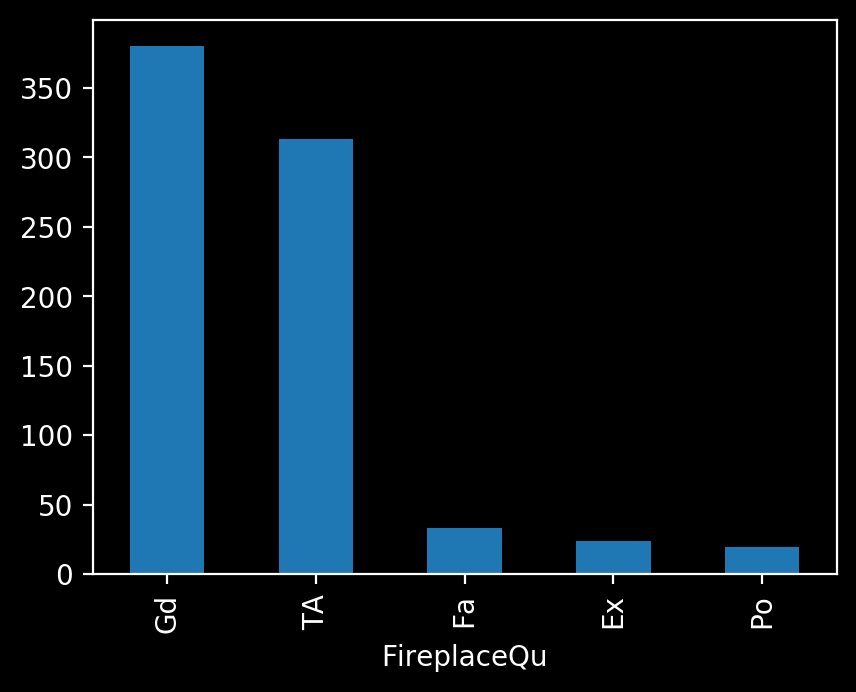

In [18]:
df.groupby(['FireplaceQu'])['FireplaceQu'].count().sort_values(ascending=False).plot.bar()

In [24]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [27]:
df['GarageType'].mode()[0]

'Attchd'

In [20]:
## Replacement Function
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [22]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [23]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

# Adding a Variable to Capture NaN
Here we add the 'most frequent category' to the NaNs but at the same time by creating the new category, we are capturing the important of missing values.

In [6]:
import pandas as pd
df = pd.read_csv(gdhousing,usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [13]:
import numpy as np
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,NaN,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [14]:
frequent = df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,NaN,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [15]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


## If there are multiple frequent categories, we just replace NaN with a compteley new category

In [24]:
import pandas as pd
df = pd.read_csv(gdhousing,usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
print(df.head())
df.shape

  BsmtQual FireplaceQu GarageType  SalePrice
0       Gd         NaN     Attchd     208500
1       Gd          TA     Attchd     181500
2       Gd          TA     Attchd     223500
3       TA          Gd     Detchd     140000
4       Gd          TA     Attchd     250000


(1460, 4)

In [26]:
def impute_nan(df, variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [27]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)

In [28]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [31]:
df = df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
